# Task 6.5 Unsupervised Machine Learning - Clustering

### This script contains the following

#### 1. Importing libraries and data
#### 2. Cleaning and wrangling of data
#### 3. Conducting the elbow technique
#### 4. Running the k-means algorithm

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where the k-means algorithm is imported from scikit.learn
import pylab as pl # pylab is a convenience module that bulk imports matplotlib

In [2]:
# This option ensures charts/graphs created are displayed in this notebook without the need to "call" call the specifically

%matplotlib inline

In [3]:
# Setting environment variable to avoid memory leak issue

os.environ["OMP_NUM_THREADS"] = "2"

In [4]:
path = r'C:\Users\terry\Documents\Data Analytics Course\Achievement 6'

In [6]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'Gun_violence_Data_cleaned.csv'))

In [10]:
pd.set_option('display.max_columns', None)
df.head()

,incident_id,date,Date4,state,city_or_county,address,number_killed,number_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,number_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_status,participant_type,state_house_district,state_senate_district
0,461105,01/01/2013,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,14.0,NaN,NaN,Shot - Wounded/Injured|Mass Shooting (4+ victi...,40.3467,NaN,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,"0, 20","0, Adult 18+|1, Adult 18+|2, Adult 18+|3, Adul...","0, Male|1, Male|3, Male|4, Female","0, Julian Sims","0, Arrested|1, Injured|2, Injured|3, Injured|4...","0, Victim|1, Victim|2, Victim|3, Victim|4, Sub...",NaN,NaN
1,460726,01/01/2013,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,43.0,NaN,NaN,"Shot - Wounded/Injured|Shot - Dead (murder, ac...",33.9090,NaN,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,"0, 20","0, Adult 18+|1, Adult 18+|2, Adult 18+|3, Adul...","0, Male","0, Bernard Gillis","0, Killed|1, Injured|2, Injured|3, Injured","0, Victim|1, Victim|2, Victim|3, Victim|4, Sub...",62.0,35.0
2,478855,01/01/2013,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,9.0,"0, Unknown|1, Unknown","0, Unknown|1, Unknown","Shot - Wounded/Injured|Shot - Dead (murder, ac...",41.4455,Cotton Club,-82.1377,2.0,NaN,"0, 25|1, 31|2, 33|3, 34|4, 33","0, Adult 18+|1, Adult 18+|2, Adult 18+|3, Adul...","0, Male|1, Male|2, Male|3, Male|4, Male","0, Damien Bell|1, Desmen Noble|2, Herman Seage...","0, Injured, Unharmed, Arrested|1, Unharmed, Ar...","0, Subject-Suspect|1, Subject-Suspect|2, Victi...",56.0,13.0
3,478925,05/01/2013,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,6.0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)|Offi...",39.6518,NaN,-104.8020,NaN,NaN,"0, 29|1, 33|2, 56|3, 33","0, Adult 18+|1, Adult 18+|2, Adult 18+|3, Adul...","0, Female|1, Male|2, Male|3, Male","0, Stacie Philbrook|1, Christopher Ratliffe|2,...","0, Killed|1, Killed|2, Killed|3, Killed","0, Victim|1, Victim|2, Victim|3, Subject-Suspect",40.0,28.0
4,478959,07/01/2013,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,6.0,"0, Unknown|1, Unknown","0, Handgun|1, Handgun","Shot - Wounded/Injured|Shot - Dead (murder, ac...",36.1140,NaN,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,"0, 18|1, 46|2, 14|3, 47","0, Adult 18+|1, Adult 18+|2, Teen 12-17|3, Adu...","0, Female|1, Male|2, Male|3, Female","0, Danielle Imani Jameison|1, Maurice Eugene E...","0, Injured|1, Injured|2, Killed|3, Killed","0, Victim|1, Victim|2, Victim|3, Subject-Suspect",62.0,27.0


In [8]:
df.shape

(239677, 28)

### 2. Cleaning and wrangling of data

In [11]:
# Checking missing values

df.isnull().sum()

incident_id                         0
date                                0
Date4                               0
state                               0
city_or_county                      0
address                             0
number_killed                       0
number_injured                      0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
incident_characteristics          326
latitude                         7923
location_description           197588
longitude                        7923
number_guns_involved            99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_name               122253
participant_status              27626
participant_type                24863
state_house_

In [12]:
# Selecting only necessary columns to work with

columns = [
    "incident_id",
    "Date4",
    "state",
    "number_killed",
    "number_injured",
    "latitude",
    "longitude"
]



In [13]:
df_sub = df[columns]

In [15]:
df_sub.head()

,incident_id,Date4,state,number_killed,number_injured,latitude,longitude
0,461105,2013-01-01,Pennsylvania,0,4,40.3467,-79.8559
1,460726,2013-01-01,California,1,3,33.9090,-118.3330
2,478855,2013-01-01,Ohio,1,3,41.4455,-82.1377
3,478925,2013-01-05,Colorado,4,0,39.6518,-104.8020
4,478959,2013-01-07,North Carolina,2,2,36.1140,-79.9569


In [16]:
# Renaming column(s)

df_sub = df_sub.rename(columns={'Date4' : 'date'})

Transforming state (categorical variable) into a numerical format since k-means algorithm assumes numerical data


#### Using One-Hot Encoding

In [17]:
df_sub_encoded = pd.get_dummies(df_sub, columns = ['state'])

In [18]:
# Checking dataframe subset with dummies

df_sub_encoded.head()

,incident_id,date,number_killed,number_injured,latitude,longitude,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_District of Columbia,state_Florida,state_Georgia,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisiana,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississippi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_North Dakota,state_Ohio,state_Oklahoma,state_Oregon,state_Pennsylvania,state_Rhode Island,state_South Carolina,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,461105,2013-01-01,0,4,40.3467,-79.8559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,460726,2013-01-01,1,3,33.9090,-118.3330,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,478855,2013-01-01,1,3,41.4455,-82.1377,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,478925,2013-01-05,4,0,39.6518,-104.8020,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,478959,2013-01-07,2,2,36.1140,-79.9569,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
# Converting "date" to datetime format

df_sub_encoded["date"] = pd.to_datetime(df_sub_encoded["date"])

In [23]:
# Converting "date" to integer format

df_sub_encoded["numeric_date"] = df_sub_encoded["date"].dt.strftime("%Y%m%d").astype(int)

In [25]:
# Checking new "numeric date" format

df_sub_encoded.head()

,incident_id,date,number_killed,number_injured,latitude,longitude,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_District of Columbia,state_Florida,state_Georgia,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisiana,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississippi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_North Dakota,state_Ohio,state_Oklahoma,state_Oregon,state_Pennsylvania,state_Rhode Island,state_South Carolina,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,numeric_date
0,461105,2013-01-01,0,4,40.3467,-79.8559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,20130101
1,460726,2013-01-01,1,3,33.9090,-118.3330,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,20130101
2,478855,2013-01-01,1,3,41.4455,-82.1377,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,20130101
3,478925,2013-01-05,4,0,39.6518,-104.8020,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,20130105
4,478959,2013-01-07,2,2,36.1140,-79.9569,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,20130107


In [26]:
# Dropping the original date column

df_sub_encoded = df_sub_encoded.drop(columns=["date"])

In [27]:
df_sub_encoded.columns

Index(['incident_id', 'number_killed', 'number_injured', 'latitude',
       'longitude', 'state_Alabama', 'state_Alaska', 'state_Arizona',
       'state_Arkansas', 'state_California', 'state_Colorado',
       'state_Connecticut', 'state_Delaware', 'state_District of Columbia',
       'state_Florida', 'state_Georgia', 'state_Hawaii', 'state_Idaho',
       'state_Illinois', 'state_Indiana', 'state_Iowa', 'state_Kansas',
       'state_Kentucky', 'state_Louisiana', 'state_Maine', 'state_Maryland',
       'state_Massachusetts', 'state_Michigan', 'state_Minnesota',
       'state_Mississippi', 'state_Missouri', 'state_Montana',
       'state_Nebraska', 'state_Nevada', 'state_New Hampshire',
       'state_New Jersey', 'state_New Mexico', 'state_New York',
       'state_North Carolina', 'state_North Dakota', 'state_Ohio',
       'state_Oklahoma', 'state_Oregon', 'state_Pennsylvania',
       'state_Rhode Island', 'state_South Carolina', 'state_South Dakota',
       'state_Tennessee', 'state_Texa

In [30]:
#Reordering the columns

col = df_sub_encoded.pop("numeric_date") # Remove column
df_sub_encoded.insert(1, "numeric_date", col) # Insert at index 1

In [31]:
df_sub_encoded.head()

,incident_id,numeric_date,number_killed,number_injured,latitude,longitude,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_District of Columbia,state_Florida,state_Georgia,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisiana,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississippi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_North Dakota,state_Ohio,state_Oklahoma,state_Oregon,state_Pennsylvania,state_Rhode Island,state_South Carolina,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,461105,20130101,0,4,40.3467,-79.8559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,460726,20130101,1,3,33.9090,-118.3330,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,478855,20130101,1,3,41.4455,-82.1377,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,478925,20130105,4,0,39.6518,-104.8020,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,478959,20130107,2,2,36.1140,-79.9569,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
df_sub_encoded.isnull().sum()

incident_id                      0
numeric_date                     0
number_killed                    0
number_injured                   0
latitude                      7923
longitude                     7923
state_Alabama                    0
state_Alaska                     0
state_Arizona                    0
state_Arkansas                   0
state_California                 0
state_Colorado                   0
state_Connecticut                0
state_Delaware                   0
state_District of Columbia       0
state_Florida                    0
state_Georgia                    0
state_Hawaii                     0
state_Idaho                      0
state_Illinois                   0
state_Indiana                    0
state_Iowa                       0
state_Kansas                     0
state_Kentucky                   0
state_Louisiana                  0
state_Maine                      0
state_Maryland                   0
state_Massachusetts              0
state_Michigan      

In [36]:
# Replacing NaN values with False, then, 
# Converting state values (True/False) to binary (1/0)

df_sub_encoded = df_sub_encoded.fillna(False).astype(int)
df_sub_encoded = df_sub_encoded.astype(int)

In [37]:
df_sub_encoded.head()

,incident_id,numeric_date,number_killed,number_injured,latitude,longitude,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_District of Columbia,state_Florida,state_Georgia,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisiana,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississippi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_North Dakota,state_Ohio,state_Oklahoma,state_Oregon,state_Pennsylvania,state_Rhode Island,state_South Carolina,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,461105,20130101,0,4,40,-79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,460726,20130101,1,3,33,-118,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,478855,20130101,1,3,41,-82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,478925,20130105,4,0,39,-104,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,478959,20130107,2,2,36,-79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
df_subset_final = df_sub_encoded.rename(columns = {'numeric_date' : 'date'})

In [39]:
df_subset_final.head()

,incident_id,date,number_killed,number_injured,latitude,longitude,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_District of Columbia,state_Florida,state_Georgia,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisiana,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississippi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_North Dakota,state_Ohio,state_Oklahoma,state_Oregon,state_Pennsylvania,state_Rhode Island,state_South Carolina,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,461105,20130101,0,4,40,-79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,460726,20130101,1,3,33,-118,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,478855,20130101,1,3,41,-82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,478925,20130105,4,0,39,-104,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,478959,20130107,2,2,36,-79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 3. The elbow technique

In [47]:
num_cl = (1,10) # This defines the potential range of clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # This defines the k-means clusters in the range defined above

In [48]:
score = [kmeans[i].fit(df_subset_final).score(df_subset_final) for i in range(len(kmeans))] # This creates a score that represents
# the rate of variation for the given cluster option

In [49]:
score

[-2.06297317862387e+16, -187721255371936.56]

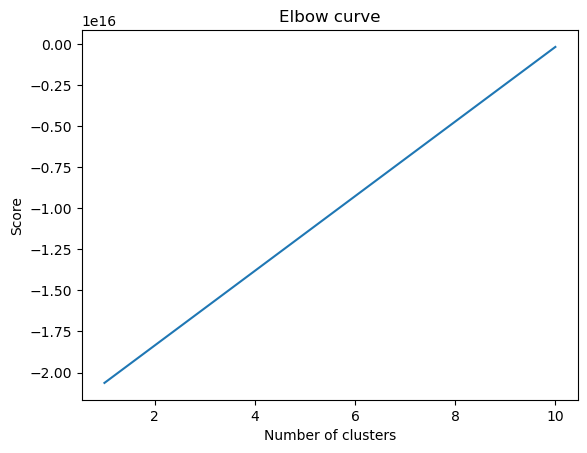

In [50]:
# Plottint the elbow curve using pylab

pl.plot(num_cl, score)
pl.xlabel('Number of clusters')
pl.ylabel('Score')
pl.title('Elbow curve')
pl.show()

The absence of a "sharp bend" or "elbow" but a straight line at a 45-degree angle suggests, 1. there might not be a clear optimal number of clusters and in this case, the decision about how many clusters to choose might require further exploration possibly using other methods. 2. This could also indicate that the dataset is fairly well-separated and doesn't have a natural "elbow" or inherent grouping structure. 

### 4. Kmeans clustering

In [65]:
# Creating a k-means object

kmeans = KMeans(n_clusters = 3) # I decided to choose 3 clusters since the elbow curve couldn't provide any guidance.

In [60]:
kmeans.fit(df_subset_final)

KMeans(n_clusters=3)

In [61]:
df_subset_final['clusters'] = kmeans.fit_predict(df_subset_final)

In [71]:
df_subset_final.head(100)

,incident_id,date,number_killed,number_injured,latitude,longitude,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_District of Columbia,state_Florida,state_Georgia,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisiana,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississippi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_North Dakota,state_Ohio,state_Oklahoma,state_Oregon,state_Pennsylvania,state_Rhode Island,state_South Carolina,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,clusters,Cluster
0,461105,20130101,0,4,40,-79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0
1,460726,20130101,1,3,33,-118,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
2,478855,20130101,1,3,41,-82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
3,478925,20130105,4,0,39,-104,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
4,478959,20130107,2,2,36,-79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,489581,20130607,6,1,34,-118,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
96,487645,20130609,0,4,39,-76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0
97,487659,20130610,0,6,38,-90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
98,487670,20130610,1,4,41,-87,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0


In [63]:
df_subset_final['clusters'].value_counts()

clusters
1    82449
2    78743
0    78485
Name: count, dtype: int64

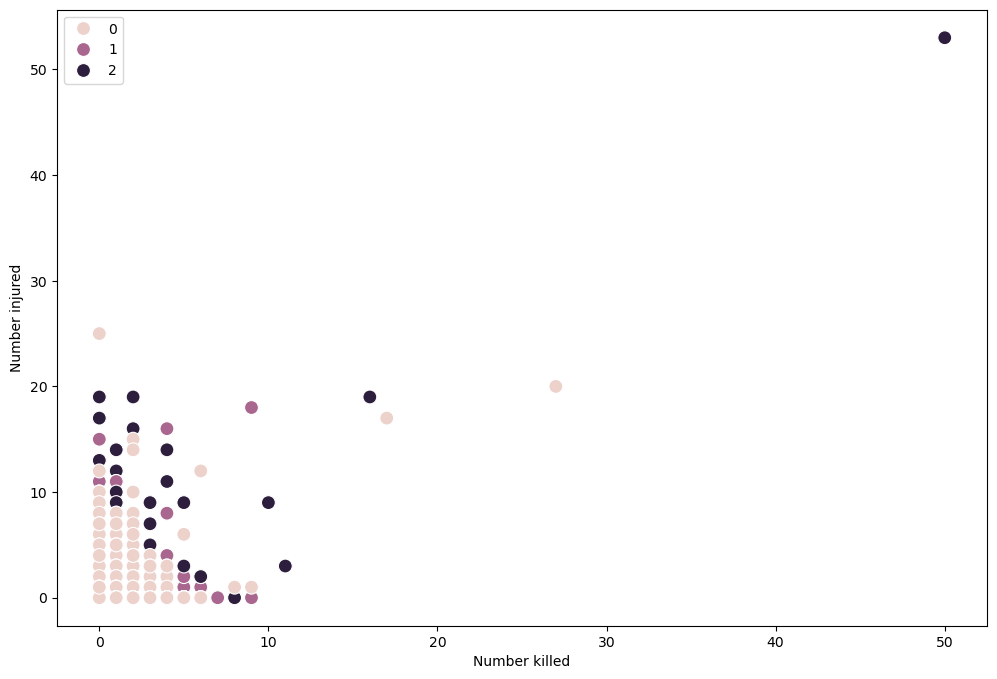

In [64]:
# Plotting the clusters for the "number injured" and "number killed" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['number_killed'], y=df['number_injured'], hue=kmeans.labels_, s=100)
# Here, we are subsetting 'X' for the x and y arguments to avoid using their labels
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm
# `s` represents the size of the points we want to see in the plot

ax.grid(False) # This removes the grid from the background
plt.xlabel('Number killed') # Label X-axis.
plt.ylabel('Number injured') # label y-axis.
plt.show()

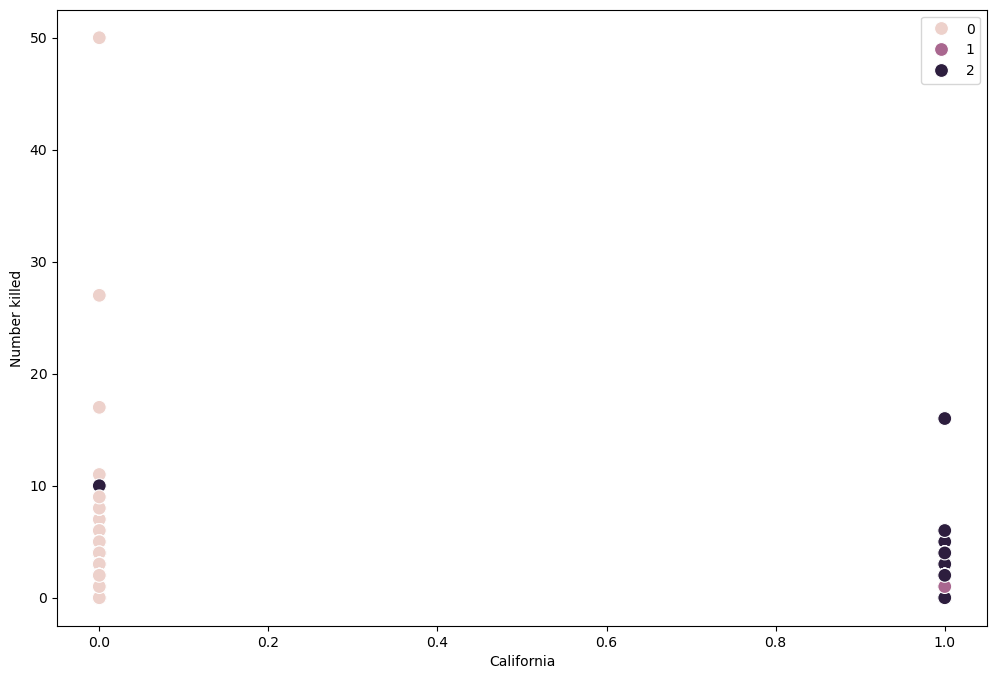

In [81]:
# Plotting the clusters for the "California" and "number killed" variables


plt.figure(figsize=(12,8))

ax = sns.scatterplot(x=df_subset_final['state_California'], y=df_subset_final['number_killed'], hue=kmeans.labels_, s=100)
# Here, we are subsetting 'X' for the x and y arguments to avoid using their labels
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm
# `s` represents the size of the points we want to see in the plot

ax.grid(False) # This removes the grid from the background
plt.xlabel('California') # Label X-axis.
plt.ylabel('Number killed') # label y-axis.
plt.show()

In [85]:
df_subset_final.loc[df_subset_final['clusters'] == 2, 'cluster'] = 'dark purple'
df_subset_final.loc[df_subset_final['clusters'] == 1, 'cluster'] = 'purple'
df_subset_final.loc[df_subset_final['clusters'] == 0, 'cluster'] = 'pink'

In [86]:
df_subset_final.groupby('cluster').agg({'number_killed':['mean', 'median'],
                                        'number_injured':['mean', 'median'],
                                        'state_California':['mean', 'median'],
                                        'state_Texas':['mean', 'median'],
                                        'state_Florida':['mean', 'median']})

number_killed        number_injured        state_California  \
                     mean median           mean median             mean   
cluster                                                                   
dark purple      0.257686    0.0       0.525761    0.0         0.059624   
pink             0.252010    0.0       0.484016    0.0         0.075416   
purple           0.247401    0.0       0.473189    0.0         0.069037   

                   state_Texas        state_Florida         
            median        mean median          mean median  
cluster                                                     
dark purple    0.0    0.061796    0.0      0.063917    0.0  
pink           0.0    0.048328    0.0      0.066115    0.0  
purple         0.0    0.059649    0.0      0.058303    0.0

The clusters in this excercise didn't make any sense in the K-means results because k-means depends on distances and works best with continuous numerical data. State dummies (0 or 1) don't represent real distances, making clustering ineffective.